Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 5.299726570
Epoch: 0002, Cost: 1.766105496
Epoch: 0003, Cost: 1.158376818
Epoch: 0004, Cost: 0.917703342
Epoch: 0005, Cost: 0.783301042
Epoch: 0006, Cost: 0.695537380
Epoch: 0007, Cost: 0.631744443
Epoch: 0008, Cost: 0.583680108
Epoch: 0009, Cost: 0.545842277
Epoch: 0010, Cost: 0.515229393
Epoch: 0011, Cost: 0.490345960
Epoch: 0012, Cost: 0.468919316
Epoch: 0013, Cost: 0.450746486
Epoch: 0014, Cost: 0.435212241
Epoch: 0015, Cost: 0.421088744
Epoch: 0016, Cost: 0.408798827
Epoch: 0017, Cost: 0.398841186
Epoch: 0018, Cost: 0.388627392
Epoch: 0019, Cost: 0.380075625
Epoch: 0020, Cost: 0.372286832
Epoch: 0021, Cost: 0.365126517
Epoch: 0022, Cost: 0.358317006
Epoch: 0023, Cost: 0.351961587
Epoch: 0024, Cost: 0.346000134
Epoch: 0025, Cost: 0.340756767
Epoch: 0026, Cost: 0.336185698


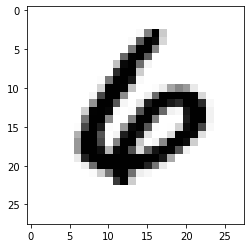

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 숫자 데이터 인풋
X = tf.placeholder(tf.float32, [None, 784])
# 기대값(0~9)
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

# hypothesis, cost, train이 실제 우리의 모델!
hypothesis = tf.matmul(X, W) + b
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis,
    labels=tf.stop_gradient(Y)
))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
            
        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")
    print("Learning Finished!")
    
    # Test model and check accuracy
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}))

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest"
    )
    plt.show()